# <div align="center">Shopify Technical Challenge Submission </div>
## <div align="center"> Data Science Intern </div>
### <div align="center"> Fall 2021 </div>
## <div align="center">Eugene Trostin</div>

Question 1: Given some sample data, write a program to answer the following: [click here to access the required data set](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0)

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.


###### This is a summary, the code below explains how the results were found
a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
* $\$$3145.13 is not the AOV, this calculation takes the average revenue for March 
* Steps to evaluate this data
    * Clean and tidy data 
    * Exploratory Data Analysis 
    * Compute AOV per purchase
    * Calculate AOV per store

b. What metric would you report for this dataset?
* Following these sources [1](https://www.optimizely.com/optimization-glossary/average-order-value/) [2](https://www.shopify.com/blog/average-order-value) AOV is calculated by taking the revenue and dividing it by the number of orders
* Problem: During exploratory analysis I found that store 78 and 42 show some irregularities, overestimating AOV calculation
* Solution: Calculate AOV for all three and pick the most representative AOV
    * AOV for all stores
    * AOV for all stores omitting store 78
    * AOV for all stores omitting store 78 and 42

c. What is its value?

The most conservative AOV is $\$$150.4, further investigation needed for stores 78 and 42

##### Reasoning
* The AOV for all stores is $\$$387.74
    * Main concern: why are shoes being sold at $\$$25725?
    * Large standart deviation of $\$$2441.96
    * This AOV should not be used but it is a good baseline to improve on
    
* The AOV for all stores $\$$152.48 , excluding store 78
    * Max value for AOV is $\$$352, which is roughly double the average AOV
        * This appears to be a larger order overall
        * For this level of analysis may potencially be unrepresentative 
        * Needs clarification why shoes are being sold for $\$$2717
    * Standart deviation (spread) is $\$$31.26
* **The AOV for all stores $\$$150.4 , excluding store 78 and 42**
    * Smaller spread $\$$23.85
    * Max value for AOV is $\$$201
    * Removed all outliers from AOV

## Issues that need to addresed

#### Store 78 
 * Sells shoes for $\$$25725 where some orders were payed in cash 
     * Reporting error?
     * Currency differences?

#### Store 42
* Large orders are placed approx. every three days at exactly 4AM
   * Potencially an automatic order by user 607
   * 2000 shoes is alot, should contact the store to check up
* Shoes are priced at $\$$ 352

## Recomendation 
* Further analysis for order amount, why are some shoes being sold above $\$$1000?

Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

a. How many orders were shipped by Speedy Express in total?
* 54 orders were shipped by Speedy Express

* Code Replication

    * SELECT COUNT(*) AS NumberOfOrders
    * FROM [Orders]
    * JOIN [Shippers]
    * ON [Shippers].ShipperID = [Orders].ShipperID
    * WHERE [Shippers].ShipperName = 'Speedy Express'



b. What is the last name of the employee with the most orders?

* Peacock had the most orders, completing 40 orders 
* Code Replication
    * SELECT [Employees].LastName, COUNT(*) AS NumberOfOrders
    * FROM [Orders]
    * JOIN [Employees]
    * ON [Orders].EmployeeID = [Employees].EmployeeID
    * GROUP BY [Employees].LastName
    * ORDER BY NumberOfOrders DESC
    * LIMIT 1

c. What product was ordered the most by customers in Germany?

* Boston Crab Meat was ordered the most by customers in Germany
* Code Replication
    * SELECT [Products].ProductName,
    * SUM([OrderDetails].Quantity) AS "TotalOrdered"
    * FROM [Orders]
    * JOIN [Customers]
    * ON [Customers].CustomerID = [Orders].CustomerID
    * JOIN [OrderDetails]
    * ON [OrderDetails].OrderID = [Orders].OrderID
    * JOIN [Products]
    * ON [Products].ProductID = [OrderDetails].ProductID
    * WHERE [Customers].Country = 'Germany'
    * GROUP BY [OrderDetails].ProductID
    * ORDER BY TotalOrdered DESC

In [1]:
#Importing the needed packages
import pandas as pd
import numpy as np
import IPython

In [2]:
#Reading in data
filefolder = r"C:\Users\eugen\Desktop\Assigment".replace("\\","/")
Q1=''.join([filefolder,"/2019 Winter Data Science Intern Challenge Data Set.xlsx"])
df=pd.read_excel(Q1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


In [4]:
#Making copy 
AOV=df.copy()

In [5]:
#Tidy data

#converted datatime64(ns) into string
AOV['created_at'] = AOV['created_at'].astype('str')
#Split data into date and time
AOV[['date','time']]=AOV['created_at'].str.split(pat=' ',expand=True)
#Split date into year, month, day
AOV[['year','month','day']]=AOV['date'].str.split(pat='-',expand=True)
#Split time into hour, min, second
AOV[['hour','minute','second']]=AOV['time'].str.split(pat=':',expand=True)
#Dropped unnecessary collumns
AOV = AOV.drop(['created_at','date','time','order_id','second','year'], axis=1)
#Display 
AOV.head()

,shop_id,user_id,order_amount,total_items,payment_method,month,day,hour,minute
0,53,746,224,2,cash,03,13,12,36
1,92,925,90,1,cash,03,03,17,38
2,44,861,144,1,cash,03,14,04,23
3,18,935,156,1,credit_card,03,26,12,43
4,18,883,156,1,credit_card,03,01,04,35


In [6]:
#Changed datatype to view summary statistics
AOV = AOV.astype({'month': 'int64','day':'int64','hour':'int64','minute':'int64'})
display(AOV.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   shop_id         5000 non-null   int64 
 1   user_id         5000 non-null   int64 
 2   order_amount    5000 non-null   int64 
 3   total_items     5000 non-null   int64 
 4   payment_method  5000 non-null   object
 5   month           5000 non-null   int64 
 6   day             5000 non-null   int64 
 7   hour            5000 non-null   int64 
 8   minute          5000 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 351.7+ KB


None

In [7]:
#Summarary statistics
display(AOV.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
shop_id,5000.0,50.0788,29.006118,1.0,24.0,50.0,75.0,100.0
user_id,5000.0,849.0924,87.798982,607.0,775.0,849.0,925.0,999.0
order_amount,5000.0,3145.1280,41282.539349,90.0,163.0,284.0,390.0,704000.0
total_items,5000.0,8.7872,116.320320,1.0,1.0,2.0,3.0,2000.0
month,5000.0,3.0000,0.000000,3.0,3.0,3.0,3.0,3.0
day,5000.0,15.4348,8.738754,1.0,8.0,16.0,23.0,30.0
hour,5000.0,11.4102,6.960720,0.0,5.0,11.0,17.0,23.0
minute,5000.0,29.3994,17.507758,0.0,14.0,29.0,45.0,59.0


In [8]:
avg_revenue= (AOV["order_amount"].mean())
print(f"{round(avg_revenue, 2)} is the average revenue for all stores, not the average order value (AOV)")

3145.13 is the average revenue for all stores, not the average order value (AOV)


AOV will be calculated using this [definiton](https://www.optimizely.com/optimization-glossary/average-order-value/) 

In [9]:
#Calculate AOV for every purchase
AOV['average_order_value_per_purchase'] = (AOV.order_amount / AOV.total_items)
AOV.head()

,shop_id,user_id,order_amount,total_items,payment_method,month,day,hour,minute,average_order_value_per_purchase
0,53,746,224,2,cash,3,13,12,36,112.0
1,92,925,90,1,cash,3,3,17,38,90.0
2,44,861,144,1,cash,3,14,4,23,144.0
3,18,935,156,1,credit_card,3,26,12,43,156.0
4,18,883,156,1,credit_card,3,1,4,35,156.0


#### Visually looked for abnormalities, convert markdown cell into code. Stores 78 and 42 are concerning

#Calculate the average AOV for every store
AOV.groupby(['shop_id'])['average_order_value_per_purchase'].mean().astype(int)
AOV_per_store = AOV.groupby(['shop_id'])['average_order_value_per_purchase'].mean().astype(int)

#Display first 50 observations
AOV_per_store.head(50)

#Display last 50 observations
AOV_per_store.tail(50)

In [10]:
#Boolean to display all observations for store 78
store78=AOV[AOV['shop_id']==78].copy()
# print all observations
store78.head(100)

,shop_id,user_id,order_amount,total_items,payment_method,month,day,hour,minute,average_order_value_per_purchase
160,78,990,25725,1,credit_card,3,12,5,56,25725.0
490,78,936,51450,2,debit,3,26,17,8,25725.0
493,78,983,51450,2,cash,3,16,21,39,25725.0
511,78,967,51450,2,cash,3,9,7,23,25725.0
617,78,760,51450,2,cash,3,18,11,18,25725.0
691,78,878,154350,6,debit,3,27,22,51,25725.0
1056,78,800,25725,1,debit,3,15,10,16,25725.0
1193,78,944,25725,1,debit,3,16,16,38,25725.0
1204,78,970,25725,1,credit_card,3,17,22,32,25725.0
1259,78,775,77175,3,credit_card,3,27,9,27,25725.0


In [11]:
#Boolean to display all observations for store 42
store42=AOV[AOV['shop_id']==42].copy()
# print all observations (there's 42)
store42.head(100)

,shop_id,user_id,order_amount,total_items,payment_method,month,day,hour,minute,average_order_value_per_purchase
15,42,607,704000,2000,credit_card,3,7,4,0,352.0
40,42,793,352,1,credit_card,3,24,14,15,352.0
60,42,607,704000,2000,credit_card,3,4,4,0,352.0
308,42,770,352,1,credit_card,3,11,18,14,352.0
409,42,904,704,2,credit_card,3,4,14,32,352.0
520,42,607,704000,2000,credit_card,3,2,4,0,352.0
834,42,792,352,1,cash,3,25,21,31,352.0
835,42,819,704,2,cash,3,9,14,15,352.0
938,42,808,1056,3,credit_card,3,13,23,43,352.0
979,42,744,352,1,debit,3,12,13,9,352.0


### Calculate three AOV's

In [12]:
#AOV for all stores
avg_AOV= (AOV["average_order_value_per_purchase"].mean())
#Print out
print(f"The AOV for all stores is {round(avg_AOV, 2)}")

The AOV for all stores is 387.74


In [13]:
#Summarary statistics 
display(AOV.describe().transpose())
# Order amount has a max of 704000 and max AOV of 25725

,count,mean,std,min,25%,50%,75%,max
shop_id,5000.0,50.0788,29.006118,1.0,24.0,50.0,75.0,100.0
user_id,5000.0,849.0924,87.798982,607.0,775.0,849.0,925.0,999.0
order_amount,5000.0,3145.1280,41282.539349,90.0,163.0,284.0,390.0,704000.0
total_items,5000.0,8.7872,116.320320,1.0,1.0,2.0,3.0,2000.0
month,5000.0,3.0000,0.000000,3.0,3.0,3.0,3.0,3.0
day,5000.0,15.4348,8.738754,1.0,8.0,16.0,23.0,30.0
hour,5000.0,11.4102,6.960720,0.0,5.0,11.0,17.0,23.0
minute,5000.0,29.3994,17.507758,0.0,14.0,29.0,45.0,59.0
average_order_value_per_purchase,5000.0,387.7428,2441.963725,90.0,133.0,153.0,169.0,25725.0


<AxesSubplot:>

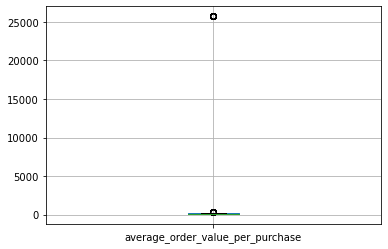

In [14]:
# Boxplot to view central deviation and whiskers
AOV.boxplot(column='average_order_value_per_purchase')

In [15]:
# Boolean to calculate average exclusing store 78
avg_AOV_without_78=AOV[AOV['shop_id']!=78].copy()
# Average AOV calculation 
avg_AOV_2= (avg_AOV_without_78["average_order_value_per_purchase"].mean())
# Print out
print(f"The AOV for all stores {round(avg_AOV_2, 2)}, excluding store 78")

The AOV for all stores 152.48, excluding store 78


In [16]:
#Summary statistics excluding store 78
display(avg_AOV_without_78.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
shop_id,4954.0,49.819540,29.014845,1.0,24.0,50.0,74.0,100.0
user_id,4954.0,848.919257,87.846007,607.0,775.0,849.0,925.0,999.0
order_amount,4954.0,2717.367784,41155.996469,90.0,163.0,284.0,390.0,704000.0
total_items,4954.0,8.851029,116.857286,1.0,1.0,2.0,3.0,2000.0
month,4954.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
day,4954.0,15.421881,8.747556,1.0,8.0,15.0,23.0,30.0
hour,4954.0,11.399677,6.962862,0.0,5.0,11.0,17.0,23.0
minute,4954.0,29.426726,17.517733,0.0,14.0,29.0,45.0,59.0
average_order_value_per_purchase,4954.0,152.475575,31.260218,90.0,132.0,153.0,168.0,352.0


<AxesSubplot:>

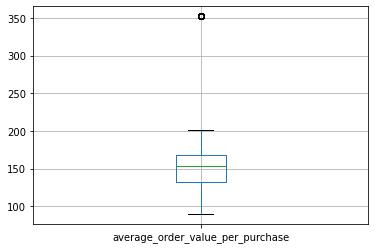

In [17]:
# Boxplot to view central deviation and whiskers
avg_AOV_without_78.boxplot(column='average_order_value_per_purchase')
# Still some outliers but not major 

In [18]:
# Boolean to calculate average exclusing store 78
avg_AOV_without_78=AOV[AOV['shop_id']!=78].copy()
# Boolean to calculate average exclusing store 78 and 42
avg_AOV_without_78_42=avg_AOV_without_78[AOV['shop_id']!=42].copy()
# Average AOV calculation 
avg_AOV_3= (avg_AOV_without_78_42["average_order_value_per_purchase"].mean())
# Print out
print(f"The AOV for all stores {round(avg_AOV_3, 2)}, excluding store 78 and 42")

The AOV for all stores 150.4, excluding store 78 and 42


<ipython-input-18-bed31c78ed43>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_AOV_without_78_42=avg_AOV_without_78[AOV['shop_id']!=42].copy()


In [19]:
#Summary statistics excluding store 78 and 42
display(avg_AOV_without_78_42.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
shop_id,4903.0,49.900877,29.154367,1.0,24.0,50.0,74.0,100.0
user_id,4903.0,849.858862,86.887947,700.0,776.0,850.0,925.0,999.0
order_amount,4903.0,300.155823,155.941112,90.0,163.0,284.0,386.5,1086.0
total_items,4903.0,1.995717,0.982602,1.0,1.0,2.0,3.0,8.0
month,4903.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
day,4903.0,15.427697,8.749193,1.0,8.0,15.0,23.0,30.0
hour,4903.0,11.416888,6.960896,0.0,5.0,11.0,17.0,23.0
minute,4903.0,29.538854,17.473477,0.0,14.0,29.0,45.0,59.0
average_order_value_per_purchase,4903.0,150.400163,23.851202,90.0,132.0,153.0,166.0,201.0


<AxesSubplot:>

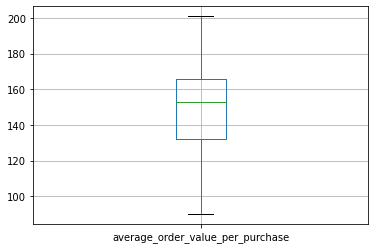

In [20]:
# Boxplot to view central deviation and whiskers
avg_AOV_without_78_42.boxplot(column='average_order_value_per_purchase')
# Removed all outliers from AOV

<AxesSubplot:>

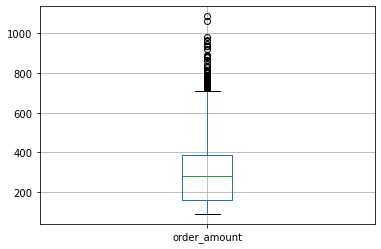

In [21]:
# Boxplot to view central deviation and whiskers
avg_AOV_without_78_42.boxplot(column='order_amount')
# A good case to use median instead of average

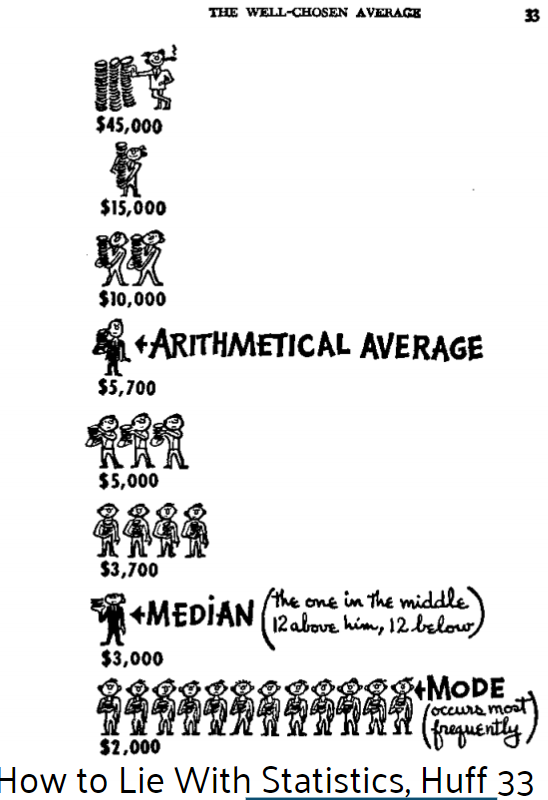

In [22]:
#Pulls image link
url = 'https://i.imgur.com/52wIcUn.png'
#Displays image
IPython.display.Image(url, width = 300)
#Issues with averages